In [38]:
from sklearn.datasets import fetch_openml


In [39]:
mnist = fetch_openml('mnist_784')

In [40]:
x,y=mnist['data'],mnist['target']

In [41]:
y.shape
x.shape

(70000, 784)

In [ ]:
%matplotlib inline

In [43]:
import matplotlib
import matplotlib.pyplot as plt

In [51]:
some_digit =x.to_numpy()[0]
some_digit_image= some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

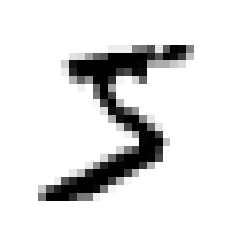

In [53]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [54]:
y[0]

'5'

In [56]:
x_train=x[:60000]
x_test=x[60000:]

In [58]:
y_train=y[:60000]
y_test=x[60000:]

In [62]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

## Creating a 2 Detector

In [81]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

y_train_5= (y_train==5)
y_test_5=(y_test==5)

In [82]:
y_test_5

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
clf = LogisticRegression(tol=0.1)

In [85]:
clf.fit(x_train,y_train_5)

c:\users\mukul\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [87]:
clf.predict([some_digit])

array([ True])

In [91]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_5,cv=3,scoring="accuracy")

c:\users\mukul\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\mukul\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [90]:
a.mean()

0.9739166666666668

## END